# Project: The Movie Database


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

What can we say about the success of a movie before it is released? Are there certain companies that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?
In this project I will apply data analytics to answer these questions and many others.

This data set contains information about 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue.
The data set can be downloaded [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv) and it is a modified version from the one provided by [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv).

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# change style for better visualization
sns.set_style("darkgrid")

# display plots in the notebook
%matplotlib inline

# force visualization of all columns
pd.set_option('display.max_columns', None)

<a id='wrangling'></a>
## Data Wrangling

### General Properties
As a first step I will read the csv file and get some general information about the structure of the data set and its content.

In [2]:
# load the data
df = pd.read_csv("tmdb-movies.csv")
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


First of all, let's describe what each column stands for:
- id - A unique id.
- imbd_id - Undefined id.
- popularity - A numeric quantity specifying the movie popularity.
- budget - The budget in which the movie was made in US dollars.
- revenue - The worldwide revenue generated by the movie US dollars.
- original_title - The title of the movie before translation or adaptation.
- cast - The cast in the movie.
- homepage - A link to the homepage of the movie.
- director - The director of the movie.
- tagline - Movie's tagline.
- keywords - The keywords or tags related to the movie.
- overview - A brief description of the movie.
- runtime - The running time of the movie in minutes.
- genres - The genre of the movie, Action, Comedy ,Thriller etc.
- production_companies - The production house of the movie.
- release_date - The date on which it was released.
- vote_count - The count of votes recieved.
- vote_average - Average ratings the movie recieved.
- release_year - Year in which the movie was released.
- budget_adj - The budget in which the movie was made accounting for inflation overtime.
- revenue_adj - The worldwide revenue generated by the movie accounting for inflation overtime.

We can already see that some columns, like 'cast' and 'keywords', contain multiple values separated by pipe (|)characters.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the information above we can see that there are many missing values in many of the columns, especially the column 'homepage'. In addition we can see that the column 'imdb_id' also contains 10 missing values.

In [4]:
df[df.imdb_id.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,sexuality|superhuman|superpower|making of|soci...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,NaN,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,marvel comic|superhero|wolverine|hulk|norse my...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,marvel comic|superhero|hulk|norse mythology|su...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",NaN,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,NaN,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,NaN,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,portal|aperture,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,NaN,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,NaN,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000,0.0


Most likely these 10 missing points are a result of an error during the dataset creation, since this is just an id, it shouldn't bring any relevant information, therefor we can ignore this column. Now we can look for other general information about the dataset.

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The table above shows some intresting information, apparently some movies had 0 budget, 0 revenue or even a runtime of 0 minutes. This doesn't seem possible, let's analyze these cases further. budget_adj and revenue_adj are of course also 0 since the value is the same but adjusted due to inflation. We can also notice the range in the year of release, it goes from 1960 till 2015, and by looking at the mean we can notice that there are much recent movies instead of old ones.

In [6]:
df.query("budget == 0 or revenue == 0 or runtime == 0")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,london|detective|sherlock holmes,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",thriller|serial killer|psychic|fbi agent|intrigue,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,gambling|bodyguard|remake,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,new year's eve|fire|showdown|terrorist|embassy,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,desert|hunting,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


There are many rows with such values, then maybe the value 0 was saved as default when ther was no data available. Let's analyze each case more specifically.

In [7]:
print(f"budget has {len(df.query('budget == 0'))} rows with value 0 in it.")
print(f"revenue has {len(df.query('revenue == 0'))} rows with value 0 in it.")
print(f"runtime has {len(df.query('runtime == 0'))} rows with value 0 in it.")

budget has 5696 rows with value 0 in it.
revenue has 6016 rows with value 0 in it.
runtime has 31 rows with value 0 in it.


Exactly as expected, the value 0 was use just to replace missing data, we will handle this in the next session.

### Data Cleaning process

#### Removing columns with redundant information

As we saw before there are some columns which have redundant or non relevant information:
- budget - is better to use the column budget_idj since take inflation into account
- revenue - is better to use the column ravenue_idj since take inflation into account
- release_date - year of release is already available in another column
- imbd_id - not relevant information since is just an id
- homepage - it contains mostly missing data and of course very old movies won't have a webpage

In [8]:
df.drop(["imdb_id", "budget", "revenue", "homepage", "release_date"], axis=1, inplace=True)

#### Create a new feature to simply the code

In [9]:
df["profitability"] = df["revenue_adj"] - df["budget_adj"]

#### Remove missing values and duplicates
Now we should remove all rows which contains missing data as well as remove duplicates.

In [10]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7031 non-null   int64  
 1   popularity            7031 non-null   float64
 2   original_title        7031 non-null   object 
 3   cast                  7031 non-null   object 
 4   director              7031 non-null   object 
 5   tagline               7031 non-null   object 
 6   keywords              7031 non-null   object 
 7   overview              7031 non-null   object 
 8   runtime               7031 non-null   int64  
 9   genres                7031 non-null   object 
 10  production_companies  7031 non-null   object 
 11  vote_count            7031 non-null   int64  
 12  vote_average          7031 non-null   float64
 13  release_year          7031 non-null   int64  
 14  budget_adj            7031 non-null   float64
 15  revenue_adj         

#### Removing outliers



In [11]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profitability
count,7031.000000,7031.000000,7031.000000,7031.000000,7031.000000,7031.000000,7.031000e+03,7.031000e+03,7.031000e+03
mean,51930.810411,0.829496,104.839994,312.713128,6.013384,1999.382307,2.500879e+07,7.644145e+07,5.143266e+07
std,81407.049737,1.180266,23.804709,693.227171,0.876495,13.468579,3.953511e+07,1.730470e+08,1.512808e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,9540.500000,0.278563,92.000000,24.000000,5.500000,1992.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,14741.000000,0.506241,101.000000,73.000000,6.100000,2003.000000,6.951084e+06,6.448898e+06,0.000000e+00
75%,46983.500000,0.956339,114.000000,263.000000,6.600000,2010.000000,3.463336e+07,7.526298e+07,4.360086e+07
max,417859.000000,32.985763,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


From the table above we can notice that the maximum value of runtime, popularity and vote_count is way above the 75 percentile, indicating outliers. Since this can still be a useful information, I will not remove it for time being.

#### Creating 2 data sets
As we saw before budget_adj,revenue_adaj and runtime dont have technically any missing value, but they are just filled with zeros. For this reason we will remove also these rows, but instead of removing them completely, we will create 2 distinct data sets, 1 in the current status and 1 without those rows.

In [12]:
df_with_zeros = df.copy()
clean_df = df.query("budget_adj != 0 and revenue_adj != 0 and runtime != 0")
del df

#### Get reference words

Last, we saw at the beginning of the notebook, some columns contain multiple values separated by pipe (|)characters.
We could duplicate these rows and have only 1 word for each column, but this will create too much redundant data since we have to make every single combination. A better way would be to collect all unique names, keywords etc. and later on use these words to filter out the data.

In [13]:
unique_cast = tuple(set(df_with_zeros["cast"].dropna().str.split("|").sum()))
unique_keywords = tuple(set(df_with_zeros["keywords"].dropna().str.split("|").sum()))
unique_genres = tuple(set(df_with_zeros["genres"].dropna().str.split("|").sum()))
unique_production_companies = tuple(set(df_with_zeros["production_companies"].dropna().str.split("|").sum()))

print("unique cast: ", len(unique_cast))
print("unique keywords: ", len(unique_keywords))
print("unique genres: ", len(unique_genres))
print("unique production companies: ", len(unique_production_companies))

unique cast:  12349
unique keywords:  6799
unique genres:  20
unique production companies:  5868


In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3445 entries, 0 to 10848
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3445 non-null   int64  
 1   popularity            3445 non-null   float64
 2   original_title        3445 non-null   object 
 3   cast                  3445 non-null   object 
 4   director              3445 non-null   object 
 5   tagline               3445 non-null   object 
 6   keywords              3445 non-null   object 
 7   overview              3445 non-null   object 
 8   runtime               3445 non-null   int64  
 9   genres                3445 non-null   object 
 10  production_companies  3445 non-null   object 
 11  vote_count            3445 non-null   int64  
 12  vote_average          3445 non-null   float64
 13  release_year          3445 non-null   int64  
 14  budget_adj            3445 non-null   float64
 15  revenue_adj         

<a id='eda'></a>
## Exploratory Data Analysis

Now that the data has been cleaned and properly formatted we can start the data analysis exploration.

### Is the revenue increasing if the budget is also increasing?

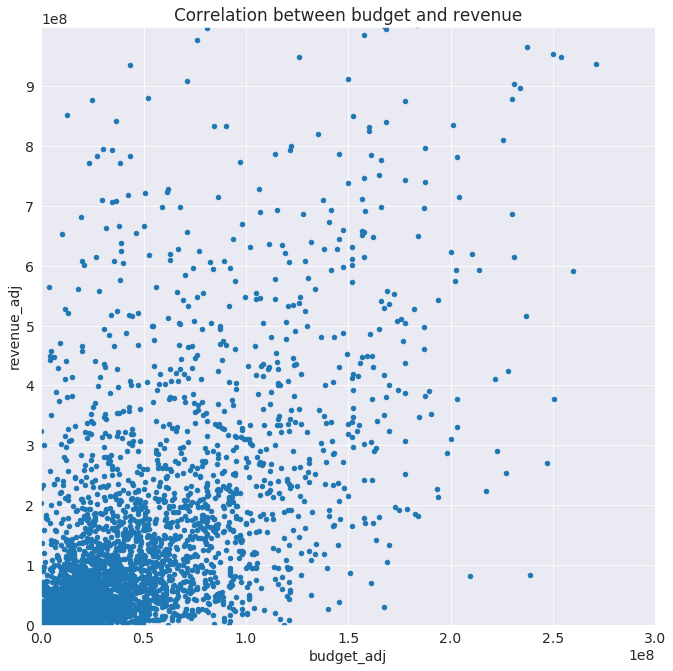

In [15]:
plt.rcParams.update({'font.size': 14})

clean_df.plot.scatter(
    "budget_adj", "revenue_adj",
    figsize=(11, 11),
    xlim=(0, 3e8),
    ylim=(0, 1e9),
    xticks=np.arange(0, 3.1e8, .5e8),
    yticks=np.arange(0, 1e9, 1e8),
    title="Correlation between budget and revenue",
);

From the graph above we can see that there is no correlation between the money spent and the revenue, this was in fact expected.

### Is there any correlation between popularity, profitability, average vote and number of votes?

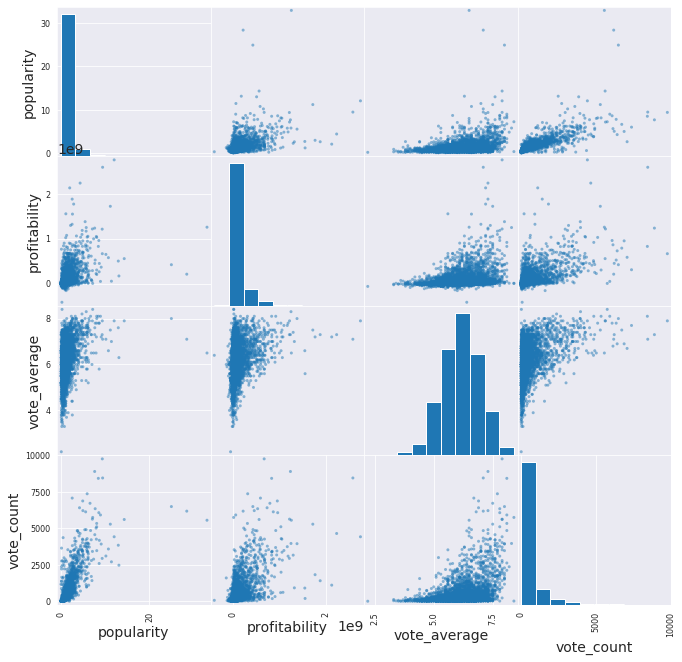

In [16]:
plt.rcParams.update({'font.size': 14})

pd.plotting.scatter_matrix(
    clean_df[["popularity", "profitability", "vote_average", "vote_count"]],
    figsize=(11, 11)
);

From the graph above we can derive a couple of information:
- When the number of votes passes ~1000 we see a jump in average vote.
- When the average vote increases the profitability also increases but non linearly.
- We the above 2 statements we can derive that the higher the vote, the more people vote, meaning more people watching the movie and increase the profits.
- Popularity and number of votes have a positive correlation.


### From all highly rated movies which genres are included?

In [17]:
df_with_zeros.query("vote_average > 7.0")["genres"].value_counts()[:5]

Drama            89
Documentary      37
Comedy|Drama     22
Drama|Romance    21
Crime|Drama      19
Name: genres, dtype: int64

Drama is definetly on top, documentary comes as second, comedy, romance and crime are about the same level.

### What about highly rated modern movies (above 2010)?

In [18]:
df_with_zeros.query("vote_average > 7.0 and release_year >= 2010")["genres"].value_counts()[:5]

Drama                29
Documentary          25
Comedy|Drama          8
Comedy                7
Documentary|Music     7
Name: genres, dtype: int64

Drama, documentary and Comedy are still in the highest rated.

### From all genres, which one is in average the most profitable?

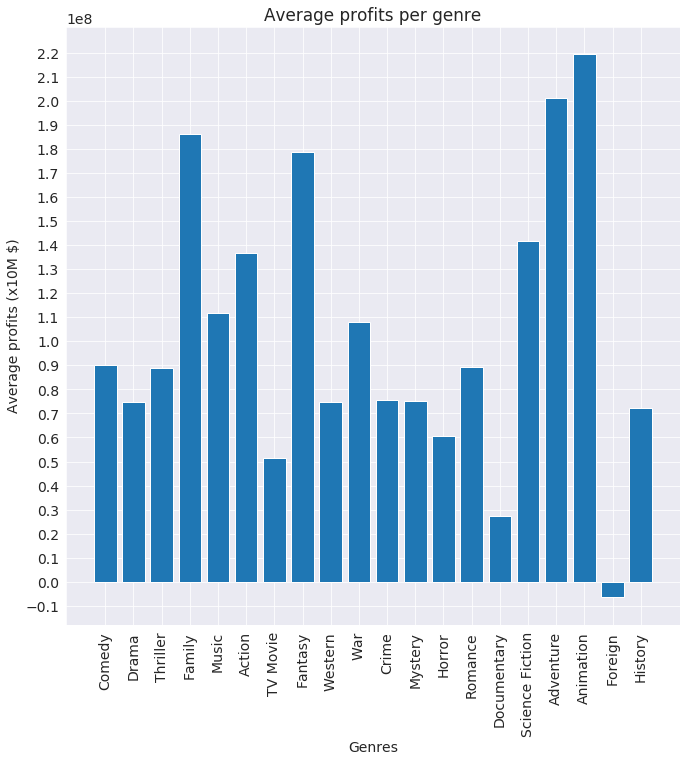

In [19]:
profits = dict()

# iterate over all available genres
for g in unique_genres:
    # filter data by genre g
    filtered_df = clean_df[clean_df['genres'].str.contains(g)]
    # calculate mean profitability
    profits[g] = filtered_df.profitability.mean()

# plot barchart with some parameters
fig, ax = plt.subplots(figsize=(11, 11))
plt.rcParams.update({'font.size': 14})

ax.bar(x=tuple(profits.keys()),height=profits.values())

ax.set_yticks(np.arange(-1e7, 23e7, 1e7))
ax.set_title("Average profits per genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Average profits (x10M $)")
plt.xticks(rotation=90)
plt.show()

Apparently the 4 most profitable genres on average are Animation, Fantasy, Adventure and Family. Documentary seems quite strangly, maybe this is related to high costs.

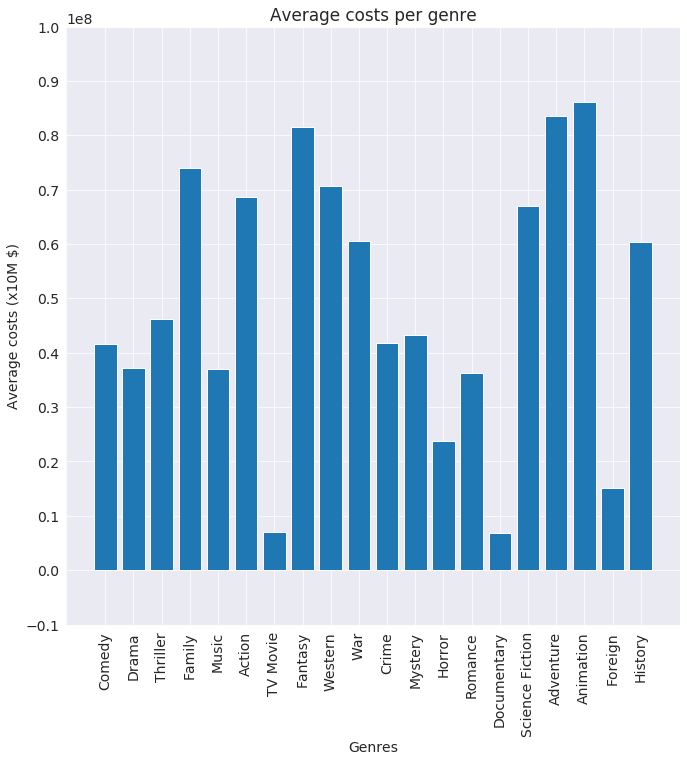

In [20]:
profits = dict()

# iterate over all available genres
for g in unique_genres:
    # filter data by genre g
    filtered_df = clean_df[clean_df['genres'].str.contains(g)]
    # calculate mean costs
    profits[g] = filtered_df.budget_adj.mean()

# plot barchart with some parameters
fig, ax = plt.subplots(figsize=(11, 11))
plt.rcParams.update({'font.size': 14})

ax.bar(x=tuple(profits.keys()),height=profits.values())

ax.set_yticks(np.arange(-1e7, 11e7, 1e7))
ax.set_title("Average costs per genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Average costs (x10M $)")
plt.xticks(rotation=90)
plt.show()

Animation, Adventure and Fantasy are the most expensive but also the most profitable then. Drama has costs in the average, like its profitability, but has best ratings. Documentary seems to have too less data to verify its costs and profitability, let's verify that.

In [21]:
# filter all documentary movies
filtered_df = df_with_zeros[df_with_zeros['genres'].str.contains("Documentary")]

print("revenue above 0: ", (filtered_df.revenue_adj > 0).sum())
print("revenue equal to 0: ", (filtered_df.revenue_adj == 0).sum())
print("budget above 0: ", (filtered_df.budget_adj > 0).sum())
print("budget equal to 0: ", (filtered_df.budget_adj == 0).sum())

revenue above 0:  57
revenue equal to 0:  101
budget above 0:  29
budget equal to 0:  129


As expected, most of the data contains 0, so this genre can't give us much information about profitability.

### How did all these genres performed in comparison over the years?

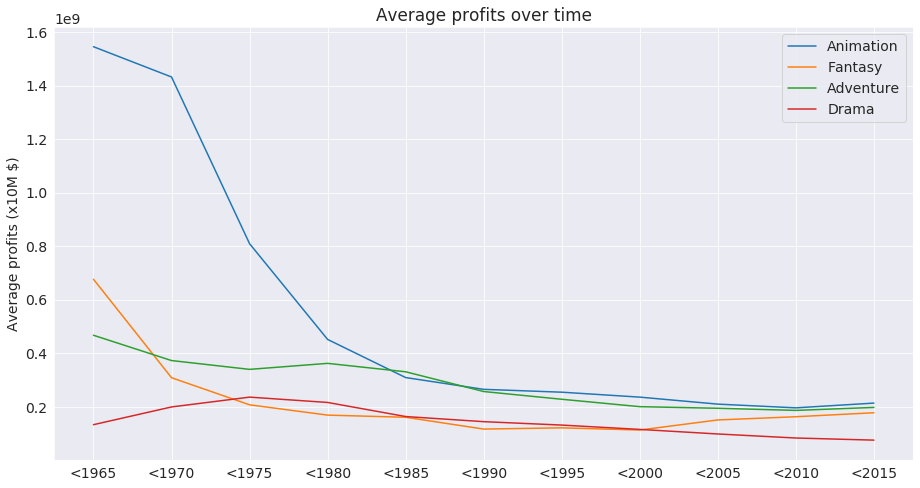

In [22]:
# plot parameters
fig, ax = plt.subplots(figsize=(13, 7))
plt.rcParams.update({'font.size': 14})

# create a range for the years
start_year = clean_df.release_year.min()
year_range = tuple(range(start_year+5, clean_df.release_year.max()+1, 5))

# the label locations
x = np.arange(len(year_range))

# genres to consider
genres = ("Animation", "Fantasy", "Adventure", "Drama")

profits = {k: [] for k in genres}
for y in year_range:
    for g in genres:
        # filter data within year range
        filtered_df = clean_df[start_year <= clean_df.release_year]
        filtered_df = filtered_df[filtered_df.release_year < y]
        # filter data by genre g
        filtered_df = filtered_df[filtered_df['genres'].str.contains(g)]
        # calculate mean profitability
        profits[g].append(filtered_df.profitability.mean())

# plot data
for k, v in profits.items():
    ax.plot(x, v, label=k)

# other plot parameters
ax.set_ylabel('Average profits (x10M $)')
ax.set_title("Average profits over time")
ax.set_xticks(x)
ax.set_xticklabels([f"<{y_}" for y_ in year_range])
ax.legend()
fig.tight_layout()
plt.show()

This graph explains well the current situation. Drama movies were more profitable in the past and even if the trend is decreasing, fantasy movies seem increasing their profits since 2000.

### From all available directors in this dataset, which one are the most profitable in fantasy movies since 2010?

In [23]:
# filter fantasy movies from 2010
filtered_df = clean_df[clean_df['genres'].str.contains("Fantasy")].query("release_year >= 2010")

# group profitability of each director
profitability = filtered_df.groupby("director")["profitability"]

print("Highest sum\n", "-"*45, sep="")
display(profitability.sum().sort_values(ascending=False)[:10])
print("Highest average\n", "-"*45, sep="")
display(profitability.mean().sort_values(ascending=False)[:10])
print("Number of profitable movies\n", "-"*45, sep="")
display(filtered_df.query("profitability > 0")["director"].value_counts().sort_values(ascending=False)[:10])

Highest sum
---------------------------------------------


director
Peter Jackson      2.041023e+09
David Yates        1.870315e+09
J.J. Abrams        1.718723e+09
Bill Condon        1.257113e+09
Marc Webb          9.760295e+08
Tim Burton         9.161935e+08
Rob Marshall       7.720942e+08
Kenneth Branagh    6.966776e+08
Raja Gosnell       6.667902e+08
David Slade        6.304913e+08
Name: profitability, dtype: float64

Highest average
---------------------------------------------


director
J.J. Abrams         1.718723e+09
David Yates         9.351576e+08
Peter Jackson       6.803409e+08
David Slade         6.304913e+08
Bill Condon         6.285565e+08
Mike Mitchell       5.876009e+08
Gary Ross           5.852426e+08
Robert Stromberg    5.327686e+08
Marc Webb           4.880147e+08
Seth MacFarlane     4.742722e+08
Name: profitability, dtype: float64

Number of profitable movies
---------------------------------------------


Zack Snyder        3
Peter Jackson      3
Kenneth Branagh    2
Tarsem Singh       2
Tim Burton         2
Rob Marshall       2
Bill Condon        2
Marc Webb          2
Bryan Singer       2
Raja Gosnell       2
Name: director, dtype: int64

Peter Jackson is the director that has the highest profit and the highest amount of profitable fantasy movies since 2010.

<a id='conclusions'></a>
## Conclusions

This has been quite a long analysis that has covered many topics, but it can still be improved further. As I mentioned already, this data set had many missing values and include a lot of old data, making it not accurate enough for a business case. Despite that, we could see an increasing trend in profitability for fantasy movies even if the cost of production is above the average, find some correlation withen the data and even see which modern director make most profitable fantasy movies.

Possible improvements are:
- Merging more data from other sources.
- Try to find the data which was missing in this data set from other internet sources.
- Use Machine Learning to dive deeper into the analysis.